# FINUFFT: A Complex Nonuniform FFT Package

***by Hongyu Ma***

***May 17, 2025***

## 1)
FINUFFT (which stands for Flatiron Institute Non-Uniform Fast Fourier Transform) is a software package which aims to provide an extremely fast FFT algorithm for nonuniform data in one, two, or three dimensions. Mathematically, Fourier Transforms assume a continuous function which can be analytically integrated to obtain an exact solution. Traditionally, a Fourier transform is defined as follows: a function $f(x)$ can be written as an integral over periodic functions of varying frequencies:
$$f(x) = \int_{-\infty}^{\infty}{C_ke^{ikx}}dk$$
...where $C_k$, which is the potentially complex weight associated with the frequency $k$, represents the amplitude and phase shift of that frequency and is defined as:
$$C_k = \frac{1}{2\pi}\int_{-\infty}^{\infty}{f(x)e^{-ikx}dx}$$
However, in the real world, one often does not know what the function underlying their data is; after all, that is why they would like to obtain a frequency spectrum of it in the first place! As such, numerical methods of obtaining a Fourier Transform must approximate the integral with a sum evaluated at the given data points:
$$C_k = \frac{1}{2\pi}\sum_{j = 1}^Mc_je^{\pm ik \cdot x_j}$$
...where $k$ is set to a predetermined range of values. This range obviously cannot be an infinite range of frequencies like in the analytical Fourier transform, as computing that would literally take forever; additionally, it cannot include arbitrarily small frequencies (due to the previous reason as well as the fundamental limitations of computer representations of floating-point numbers), meaning the computed transform will inevitably end up being periodic; it is in this sense more of a Fourier series than a Fourier transform.

Computing this sum directly would take $O(NM)$ time, where $N$ is the number of $k$s (frequencies) we would like to evaluate $C_k$ for, and $M$ is the number of data points we are evaluating the transform at. However, an algorithm known as the Fast Fourier Transform, generally credited to James Cooley and John Tukey in 1965, is able to achieve a running time of just $O(N\log N)$ by recursively breaking down the task of computing this sum by splitting the problem in half at each step and propagating results back up the chain. There's just one problem: the algorithm only works on uniformly spaced data.

Nonuniform Fast Fourier Transforms work by using various oversampling, interpolation, and/or approximation techniques to convert the nonuniform problem into one or more uniform FFT problems, use existing FFT algorithms to solve the uniform problems, and combine the results into a solution to the original nonuniform FFT problem. Such computational techniques are incredibly complex under the hood, and involve various complex transformations; the FINUFFT algorithm in question employs a convolution based on an "exponential of semicircle" kernel from previous work. Despite their greatly increased complexity, Nonuniform Fast Fourier Transform algorithms (NUFFTs) still run in $O(N\log N)$ time, albiet with a higher constant factor (as well as memory footprint and potentially a slightly lower accuracy).

## 2)
I selected this package because, as a programmer and a physicist, I find FFT algorithms very intriguing. As a physicist, I took PHYS273 (Introductory Physics: Waves and Oscillations) this semester, and was fascinated by the theory, properties, and applications of the Fourier transform. As a programmer, FFTs are usefull for many applications outside of signal processing as well. For example, when writing a software library to multiply extremely large numbers (numbers far too large to fit into a standard data type), programmers represent numbers as polynomials (essentially, performing a base conversion). To multiply such polynomials, a programmer employs FFT to avoid the $O(NM)$ runtime that would be associated with naively multiplying every term of one polynomial with every term of another polynomial.

## 3)
FINUFFT was published on August 21, 2018 by Alex H Barnett et. al. Its notable predecessors are the Chemnitz NFFT3 library (~2012) and the CMCL NUFFT library (date not found). FINUFFT is up to 10x faster than the multi-threaded Chemnitz NFFT3 library, and (in single-thread mode) up to 50x faster than the CMCL NUFFT library. The version I installed was version 2.3.1, as can be seen below:

In [1]:
!pip install finufft
import finufft
print(finufft.__version__)

2.3.1


## 4)
The package is indeed still maintained by the original authors; its most recent commit on GitHub was just a week ago from today, by the principal author of the paper. Instructions for contributing to the project are in the `contributing.md` file in their GitHub repository.

## 5,6)
I had no difficulty installing the package the standard way with `pip install finufft`. However, the documentation notes that compiling the library from source will use the `-march=native` flag when compiling the library, which should result in improved performance by employing features specific to one's own CPU. However, both methods listed in different places on the FINUFFT documentation page ultimately ended up being unsuccessful for me. `pip install --no-binary finufft finufft` lead to an incompatibility error with CMake, and fixing that lead to the error `Can not find target to add properties to: fftw3_omp`, which was when I ultimately gave up. Cloning the repository with `git clone` and then running `!pip install finufft/python/finufft` led directly to the second error.

## 7)
The source code is available on [GitHub](https://github.com/flatironinstitute/finufft).

## 8, 22)
FINUFFT is used in the nifty-ls package, which evaluates the Lomb-Scargle periodogram, used for identifying periodicity in irregularly-spaced observations. It is also used in cuFINUFFT, a sister to the FINUFFT package that runs on a GPU instead of a CPU and leverages the massive parallel-processing capabilities of a GPU to greatly speed up performance.

Other than that, FINUFFT additionally appears in "Time Series Analysis of GJ 3942" by Andrew Fonseca and Sarah Dodson-Robinson, as well as "Aliasing error of the exp$(\beta \sqrt{1-z^2})$ kernel in the nonuniform fast Fourier transform" by Barnett himself (which is a paper proving an error bound on his own algorithm).

## 9
The code comes in the form of a software package, and has interfaces in C/C++, Fortran, MATLAB/Octave, Python, and Julia.

## 11)
FINUFFT does not produce any figures; it is purely a computational software package, and contains a set of computational algorithms; nothing more. I had to create the figures myself using matplotlib.

## 13)
FINUFFT offers a purely Python interface, but its internals are written almost entirely in C/C++ and Cuda (a language used for programming NVIDIA GPUs), as can be seen under the Languages section in its GitHub repository. If its internals were written purely in Python, it would run significantly slower.

## 14, 15)
The Python interface includes several methods, which generally take as input a set of points and their respective strengths (think of them as the x and y coordinates of the point) in the form of two numpy arrays and output the computed Fourier series coefficients in the form of a numpy array. The inputs can be randomly generated from scratch if so desired.

## 16, 17)
The package comes with automated tests, but these are only accessible if you download a local copy of their GitHub repository. Below shows a run of the automated tests provided by the authors of the package. Unfortunately, 7 out of 12 of the tests fail. There is unfortunately nothing that can be done about this, as I have already tried uninstalling and reinstalling the package, and I am unable to successfully build the package from scratch. However, the failure message listed below only implies that the function failed to throw an error indicating a lack of compatibility with real dtypes, so there is a chance that the test failures occurred only because the package warned of deprecation rather than throwing an error upon encountering a data type no longer supported, and not because of a problem with the algorithm itself.

In [2]:
!pip install pytest
!pytest finufft/python/finufft/test

============================= test session starts ==============================
platform darwin -- Python 3.12.5, pytest-8.3.5, pluggy-1.5.0
rootdir: /Users/hughma/Documents/PHYS265/PHYS265-spring25/Project/finufft/python/finufft
configfile: pyproject.toml
plugins: anyio-4.4.0
collected 660 items                                                            

finufft/python/finufft/test/test_fallback.py s                           [  0%]
finufft/python/finufft/test/test_finufft_plan.py ....................... [  3%]
........................................................................ [ 14%]
........................................................................ [ 25%]
........................................................................ [ 36%]
.................................................................FF      [ 46%]
finufft/python/finufft/test/test_finufft_simple.py ..................... [ 49%]
........................................................................ [ 60%]


## 18)
FINUFFT depends on numpy. This can be seen from 1) its requirement that its array parameters be of the numpy `ndarray` data type, as well as from the message produced by running `pip install finufft` mentioning numpy as a requirement.

## 19)
The documentation provided on their website is extremely long and extensive, yet it is also surprisingly vague and hard-to-follow, particularly when it comes to their mathematical explanations and function documentation. For example, they define their "type 1" transform as:
$$f_k = \sum_{j = 1}^Mc_je^{\pm ik \cdot x_j}$$
However, they either do not tell you or make it very difficult to understand that:
1. The sum is an approximation of the usual integral $\int_L f(x)e^{-ikx}$, at only the given nonuniform points.
2. The $c_j$ are the values of the points at those given nonuniform locations.
3. The $f_k$ are the amplitudes of the $e^{ikx}$ functions which one's signal is comprised of, but missing a factor of $\frac{1}{2\pi}$.
4. The $k$ are integers in the range $[-N/2,\ N/2)$ for a given input $N$.
5. This is all due to the fact that the function expects as input a signal of periodicity $2\pi$, and as such, points with positions in the range $[-\pi,\ \pi)$.

## 10, 12)
Below are two code blocks illustrating usage of and results from their 1D type 1 transform, `nufft1d1()`.

In this first code block, I randomly generate periodic function composed of a sum of a random number of cosines with random amplitudes and frequencies, then run `nufft1d1()` on 100 nonuniform randomly generated points sampled from that function and compare its result to the ground truth frequency spectrum:

/Users/hughma/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/hughma/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


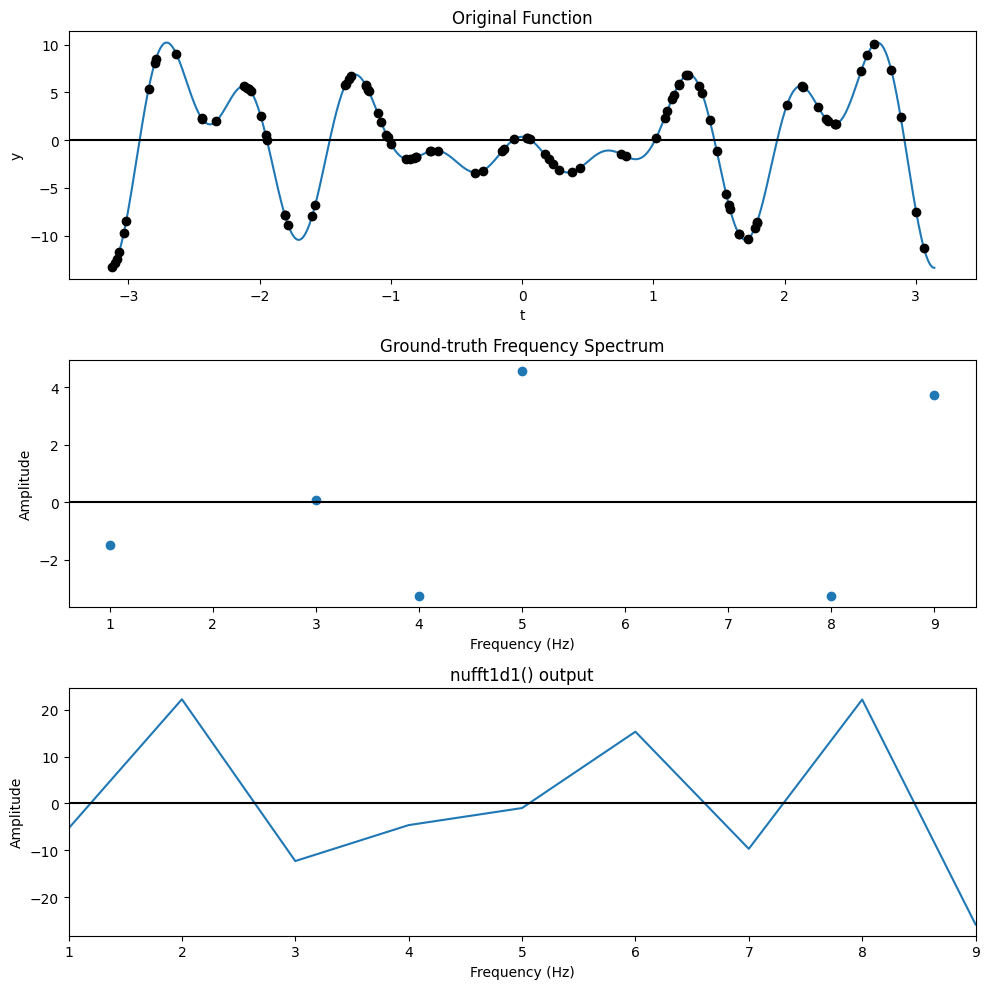

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import finufft

rng = np.random.default_rng(12345678)
# Compute sum of a random number of cosines with random amplitudes, random frequencies, and no phases.
# This simplifies things, as a cosine with no phase can be represented by an entirely real amplitude times a complex exponential of the form $e^{ikx}$.
n = rng.integers(2, 7)
amplitudes = np.zeros(n)
frequencies = np.zeros(n)
N = 20
for i in range(n):
    amplitudes[i] = rng.uniform(-5, 5)
    # Generate different frequencies each time.
    # This is because, if we end up with two terms with the same frequency, the total amplitude will just be the sum of their two amplitudes.
    while True:
        temp = rng.integers(0, N/2)
        if temp not in frequencies:
            frequencies[i] = temp
            break
def f(t):
    out = []
    for x in t:
        # finufft expects our input strengths to be complex, so we'll just add on a zero complex component to each value.
        out.append( np.sum( amplitudes * np.cos(frequencies * x) ) + 0j )
    return out
    
# Evaluate the resulting function at a random set of points (nonuniform)
t = rng.uniform(-np.pi, np.pi, 100)
y = np.array(f(t))

# Use finufft to compute the Fourier transform
C = finufft.nufft1d1(t, y, 100000000, isign=-1, eps=1e-12) / (2*np.pi)

##  Compare the resulting transform to the ground truth value:

fig, (a1, a2, a3) = plt.subplots(3, 1, figsize=(10, 10))
tt = np.linspace(-np.pi, np.pi, 1000)

# Original function from which we randomly sampled
a1.plot(tt, f(tt))
a1.plot(t, y, "ok")
a1.axhline(0, color="k")
a1.set_title("Original Function")
a1.set_xlabel("t")
a1.set_ylabel("y")

# Ground-truth frequency/amplitude plot
a2.plot(frequencies, amplitudes, "o")
a2.axhline(0, color="k")
a2.set_title("Ground-truth Frequency Spectrum")
a2.set_xlabel("Frequency (Hz)")
a2.set_ylabel("Amplitude")

# Finufft Fourier transform frequency/amplitude plot
freq_space = np.arange(0, N/2, 1)

# Because the original function is real-valued, the total transform amplitude of a given frequency
# is the sum of its amplitude with the amplitude of the negative of its frequency (complex conjugate).
a3.plot(freq_space, C[freq_space.astype(int)] + C[freq_space.astype(int)])
a3.axhline(0, color="k")
a3.set_xlim(1, 9);
a3.set_title("nufft1d1() output")
a3.set_xlabel("Frequency (Hz)")
a3.set_ylabel("Amplitude")

fig.tight_layout()

Here, I set the `nufft1d1()` parameter corresponding to the number of Fourier modes (frequencies) for which to compute the transform to $10^8$, as in my testing it appeared that higher values for that parameter generally increased accuracy, even if the original function is not actually composed of such high frequencies. However, despite my best efforts, it can be seen from the above plots that `nufft1d1()` was surprisingly inaccurate in its output. Its general shape does indeed follow that of the ground-truth frequency spectrum, but its peaks are not in the same places. Seeing this, I decided to test `nufft1d1()` on a simple sine wave, comparing its performance to that of `np.fft.rfft()` and also comparing the "original" function predicted by the two transforms to the true original function:

In [4]:
# Define an inverse complex exponential Fourier transform for nufft1d1(),
# because FINUFFT does not come with an inverse transform for its own function.
def inverse_fft(transform, N, t):
    out = 0
    for k in range(-N//2, N//2):
        out += transform[k] * np.exp(1J * k * t)
    return out

/Users/hughma/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/hughma/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


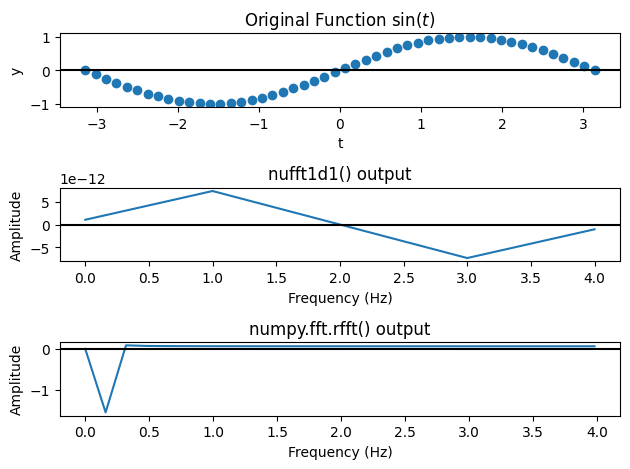

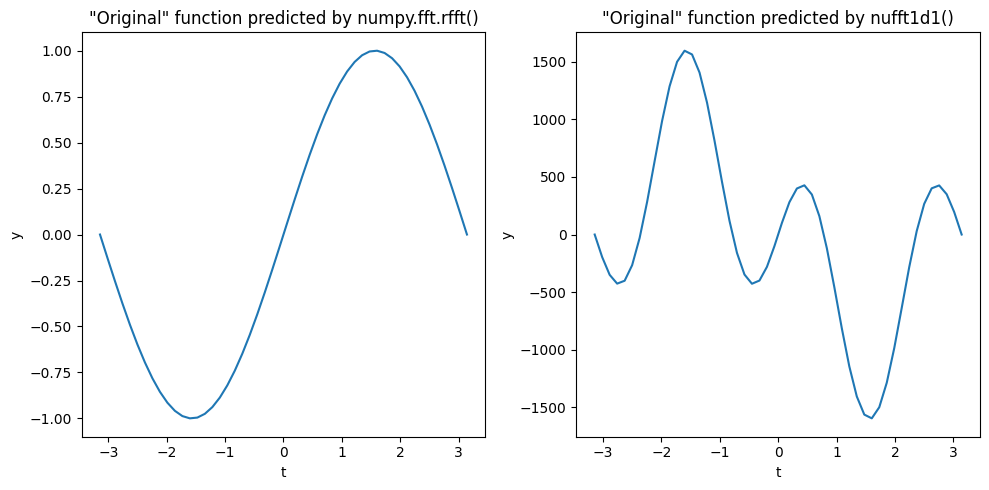

In [5]:
# Our simple sin function
def g(t):
    return np.sin(t) + 0j
    
# Compute nufft1d1() of g    
x = np.linspace(-np.pi, np.pi, 50)
Z = finufft.nufft1d1(x, g(x), 10000, isign=-1, eps = 1e-12) / (2*np.pi)

fig, (a1, a2, a3) = plt.subplots(3, 1)
a1.plot(x, g(x), "o")
a1.set_title(r"Original Function $\sin(t)$")
a1.axhline(0, color="k")
a1.set_xlabel("t")
a1.set_ylabel("y")

freqs = np.arange(0, 5, 1)
a2.plot(freqs, Z[freqs.astype(int)] + Z[-freqs.astype(int)])
a2.set_title("nufft1d1() output")
a2.axhline(0, color="k")
a2.set_xlabel("Frequency (Hz)")
a2.set_ylabel("Amplitude")

transform = np.fft.rfft(g(x).real)
freqs = np.fft.rfftfreq(50, (2 * np.pi)/50)
a3.plot(freqs, transform)
a3.set_title("numpy.fft.rfft() output")
a3.axhline(0, color="k")
a3.set_xlabel("Frequency (Hz)")
a3.set_ylabel("Amplitude")

fig.tight_layout()
inverse = np.fft.irfft(transform)
fig, (a1, a2) = plt.subplots(1, 2, figsize=(10, 5))
a1.plot(x, inverse)
a1.set_title("\"Original\" function predicted by numpy.fft.rfft()")
a1.set_xlabel("t")
a1.set_ylabel("y")

a2.plot(x, inverse_fft(Z, 10000, x))
a2.set_title("\"Original\" function predicted by nufft1d1()")
a2.set_xlabel("t")
a2.set_ylabel("y")

fig.tight_layout()

For the function $\sin(t)$, computing $10^4$ modes, `nufft1d1()` correctly located the frequency peak at 1 Hz, but incorrectly also predicted a negative amplitude for the frequency 3Hz. Even more surprisingly, `numpy.fft.rfft()` also incorrecty predicts the frequency spectrum, producing a peak at around 0.2Hz. However, the inverse transform of `numpy.fft.rfft()`'s output correctly recreates the original sine function, whereas the inverse transform of `nufft1d1()`'s output is nowhere close. Notably, decreasing the number of modes to 100 leads to the `nufft1d1()` looking like a sine function but with the wrong frequency and amplitude, and increasing the number of modes beyond $10^4$ leads to some very weird behavior in the "original" function predicted by `nufft1d1()`. It is likely that algorithms such as those provided by FINUFFT are designed to be approximately accurate for very large datasets with very complex signals, and not so much for smaller datasets with simpler signals.

## 20)
From [their ASCL.net page](https://ascl.net/2412.007):

Preferred citation method:
Please cite the GitHub repository. In addition, if FINUFFT (CPU library) was used, cite https://ui.adsabs.harvard.edu/abs/2019SJSC...41C.479B; if cuFINUFFT (GPU library) was used, cite https://ui.adsabs.harvard.edu/abs/2021arXiv210208463S

## 21)
https://finufft.readthedocs.io/en/latest/: The official FINUFFT documentation

https://en.wikipedia.org/wiki/Fast_Fourier_transform#History: For details on the invention of the modern FFT algorithm

## 23)
I did not have to learn new Python methods to use this package (apart from my unsuccessful attempts to compile the library from source). I did however have to spend a significant amount of time trying to comprehend the official documentation, as well as searching (unsuccessfully) online for anyone who actually managed to successfully get `nufft1d1()` to work in a use case similar to mine.

## 24)
I have no prior experience with FINUFFT, or even with using FFTs at all (I just know what they are and how they're used). I worked entirely by myself on this project.